# Insurance Claims-Fraud Detection:

# Problem Statement:

# Business case:

Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem. In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. In this example,you will be working with some auto insurance data to demonstrate hoe you can create a predictive model that predicts if an insurance claim is fraudulen or not.

# Importing libraries:

In [1]:
# Importing requried libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy as stats
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Importing dataset:

In [2]:
df=pd.read_csv("InsuranceClaimFraudDetection.csv")
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


Above we can see dataset and fraud_report is my target column. I have to predict if a insurance claim is fraud or not.
So the above problem is Classification problem.

# Exploratory Data Analysis (EDA):

In [3]:
# Checking shape of dataset
df.shape

(1000, 40)

In dataset we have 1000 rows and 40 columns.

In [4]:
# Checking all column names
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

Above are the list of column names in the dataset.

In [5]:
# Checking the data types of all columns
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In dataset there are 3 types of data they are integer,float, and object.

In [6]:
# Checking the info about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

Above we can see _c39  has 0 non-null values. So we can drop this column.

In [7]:
# Dropping _c39 column
df = df.drop(["_c39"],axis=1)

In [8]:
df.shape

(1000, 39)

In [9]:
# Printing all the data type and their unique values
for column in df.columns:
    if df[column].dtype==object:
        print(df[column].value_counts())
        print('****************************************************')

05-08-1992    3
01-01-2006    3
28-04-1992    3
09-08-2004    2
03-02-1997    2
             ..
15-02-2011    1
09-10-2012    1
17-07-2005    1
24-06-2009    1
17-08-1991    1
Name: policy_bind_date, Length: 951, dtype: int64
****************************************************
OH    352
IL    338
IN    310
Name: policy_state, dtype: int64
****************************************************
250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64
****************************************************
FEMALE    537
MALE      463
Name: insured_sex, dtype: int64
****************************************************
JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64
****************************************************
machine-op-inspct    93
prof-specialty       85
tech-support         78
exec-managerial      76
sales                76
craft-repa

In [10]:
# Replacing '?' with No info
df=df.replace('?','No Info')

Some of the rows are having '?' sign replacing them with NO info

In [11]:
# Printing all data type and their unique values
for column in df.columns:
    if df[column].dtype==object:
        print(df[column].value_counts())
        print('**************************************')

05-08-1992    3
01-01-2006    3
28-04-1992    3
09-08-2004    2
03-02-1997    2
             ..
15-02-2011    1
09-10-2012    1
17-07-2005    1
24-06-2009    1
17-08-1991    1
Name: policy_bind_date, Length: 951, dtype: int64
**************************************
OH    352
IL    338
IN    310
Name: policy_state, dtype: int64
**************************************
250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64
**************************************
FEMALE    537
MALE      463
Name: insured_sex, dtype: int64
**************************************
JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64
**************************************
machine-op-inspct    93
prof-specialty       85
tech-support         78
exec-managerial      76
sales                76
craft-repair         74
transport-moving     72
other-service        71
priv-hou

In [12]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


In [13]:
df['umbrella_limit'].value_counts()

 0           798
 6000000      57
 5000000      46
 4000000      39
 7000000      29
 3000000      12
 8000000       8
 9000000       5
 2000000       3
 10000000      2
-1000000       1
Name: umbrella_limit, dtype: int64

Above we can see there is one row in negative value so droping the row

In [14]:
df.loc[df['umbrella_limit']==-1000000]

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
290,284,42,526039,04-05-1995,OH,100/300,500,1338.54,-1000000,438178,...,1,No Info,94160,8560,17120,68480,Chevrolet,Malibu,1996,N


In [15]:
# Dropping this value one row
df.drop(df[df['umbrella_limit']==-1000000].index,inplace=True)

In [16]:
# Dividing ['incident_date'] into three other columns
df['incident_Date']=df['incident_date'].str.split('-').str[0]
df['incident_Month']=df['incident_date'].str.split('-').str[1]
df['incident_Year']=df['incident_date'].str.split('-').str[2]

In [17]:
# Dividing policy_bind_date into three other columns
df['policy_bind_Date']=df['policy_bind_date'].str.split('-').str[0]
df['policy_bind_Month']=df['policy_bind_date'].str.split('-').str[1]
df['policy_bind_Year']=df['policy_bind_date'].str.split('-').str[2]

In [18]:
# Dropping policy_bind_date column
df.drop('policy_bind_date',axis=1,inplace=True)

In [19]:
df.head()

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,auto_make,auto_model,auto_year,fraud_reported,incident_Date,incident_Month,incident_Year,policy_bind_Date,policy_bind_Month,policy_bind_Year
0,328,48,521585,OH,250/500,1000,1406.91,0,466132,MALE,...,Saab,92x,2004,Y,25,01,2015,17,10,2014
1,228,42,342868,IN,250/500,2000,1197.22,5000000,468176,MALE,...,Mercedes,E400,2007,Y,21,01,2015,27,06,2006
2,134,29,687698,OH,100/300,2000,1413.14,5000000,430632,FEMALE,...,Dodge,RAM,2007,N,22,02,2015,06,09,2000
3,256,41,227811,IL,250/500,2000,1415.74,6000000,608117,FEMALE,...,Chevrolet,Tahoe,2014,Y,10,01,2015,25,05,1990
4,228,44,367455,IL,500/1000,1000,1583.91,6000000,610706,MALE,...,Accura,RSX,2009,N,17,02,2015,06,06,2014


In [20]:
# Dropping the policy_number and other useless columns as well
df.drop(['policy_number','insured_zip','incident_location'],axis=1,inplace=True)

In [21]:
df.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,...,auto_make,auto_model,auto_year,fraud_reported,incident_Date,incident_Month,incident_Year,policy_bind_Date,policy_bind_Month,policy_bind_Year
0,328,48,OH,250/500,1000,1406.91,0,MALE,MD,craft-repair,...,Saab,92x,2004,Y,25,01,2015,17,10,2014
1,228,42,IN,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,...,Mercedes,E400,2007,Y,21,01,2015,27,06,2006
2,134,29,OH,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,...,Dodge,RAM,2007,N,22,02,2015,06,09,2000
3,256,41,IL,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,...,Chevrolet,Tahoe,2014,Y,10,01,2015,25,05,1990
4,228,44,IL,500/1000,1000,1583.91,6000000,MALE,Associate,sales,...,Accura,RSX,2009,N,17,02,2015,06,06,2014


In [22]:
df.shape

(999, 41)

In [23]:
df['fraud_reported'].value_counts()

N    752
Y    247
Name: fraud_reported, dtype: int64

<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

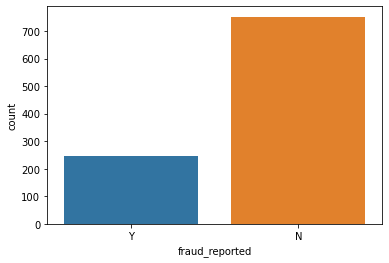

In [24]:
sns.countplot(df['fraud_reported'])

Above we can see the data is imbalance we have to deal with this

# Exploratory Data Analysis:

In [25]:
df.shape

(999, 41)

The dataset contains 999 rows and 41 columns.

<AxesSubplot:>

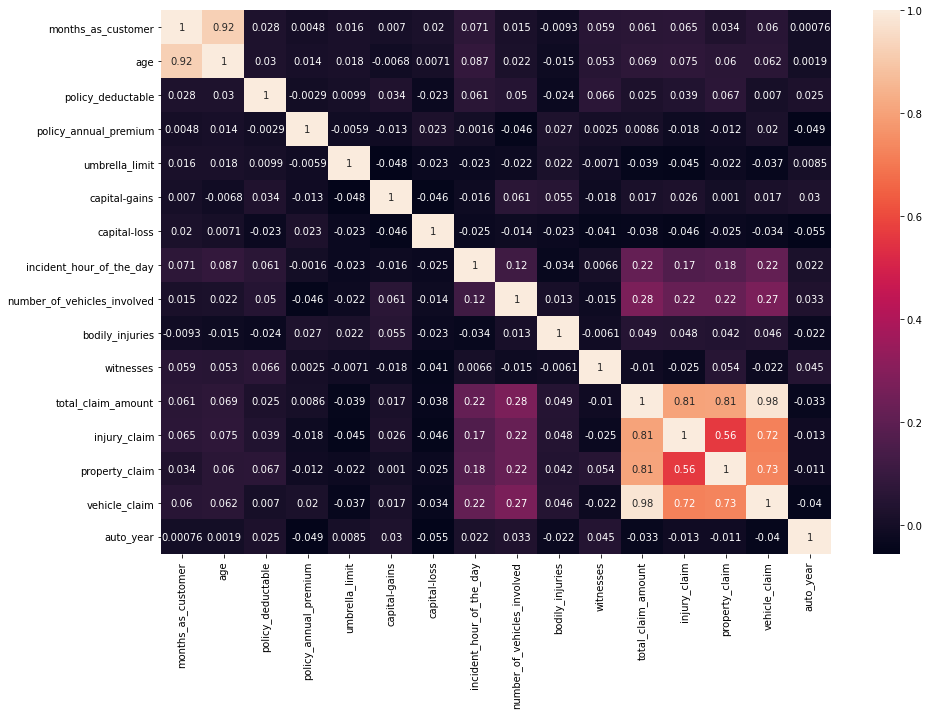

In [26]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True)

Above we can see notice total_claim_amount,injury_claim,property_claim and vehicle_claim are highly correlated with each other. Other are very least correlated with each other.

<AxesSubplot:xlabel='fraud_reported', ylabel='total_claim_amount'>

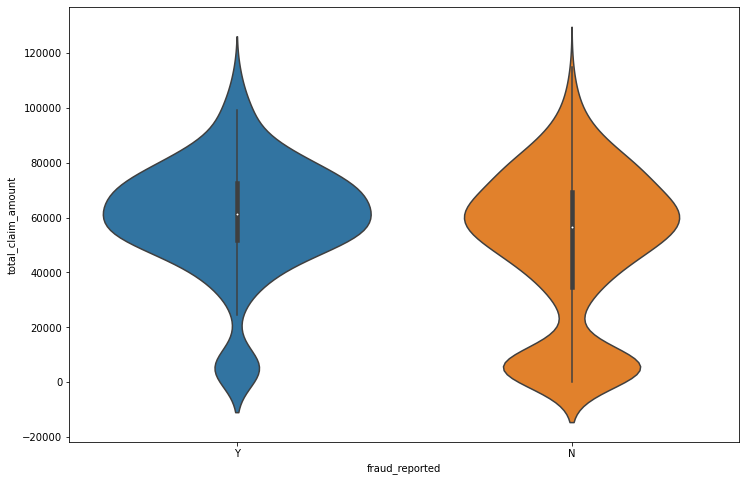

In [27]:
# Checking total_claim_amount and fraud_reported
plt.figure(figsize=(12,8))
sns.violinplot(y='total_claim_amount',x='fraud_reported',data=df)

Most of fraud reported found where total claimed amounnt 50000 to 70000

<AxesSubplot:xlabel='number_of_vehicles_involved', ylabel='count'>

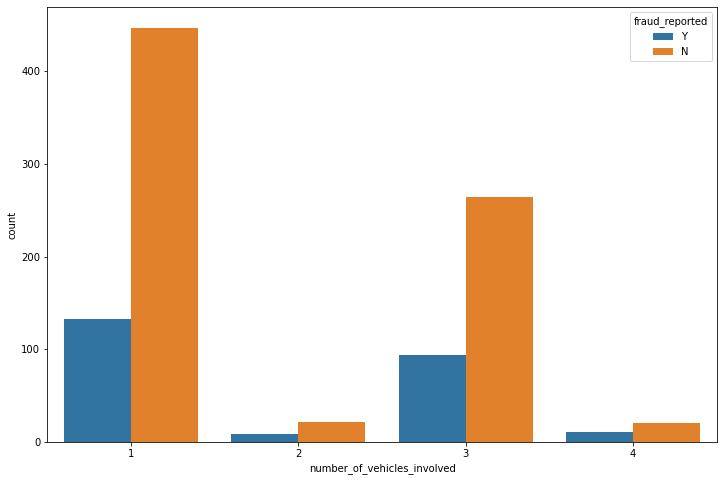

In [28]:
# Checking number_of_vehicles_involed and fraud_reported
plt.figure(figsize=(12,8))
sns.countplot(x='number_of_vehicles_involved',hue='fraud_reported',data=df)

Above we can see most of fraud report were found where number_of_vehicles_involved more than 1.

<AxesSubplot:xlabel='incident_city', ylabel='count'>

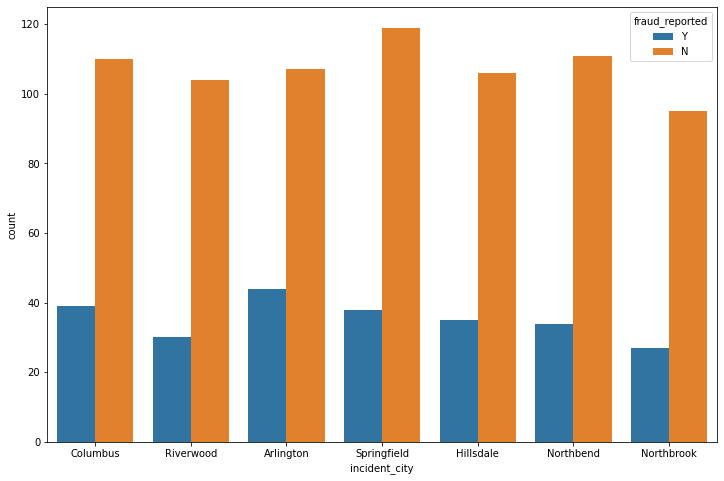

In [29]:
# Checking incident_city and fraud_reported
plt.figure(figsize=(12,8))
sns.countplot(x='incident_city',hue='fraud_reported',data=df)

Above in all cities fraud reported count are almost same.

<AxesSubplot:xlabel='incident_state', ylabel='count'>

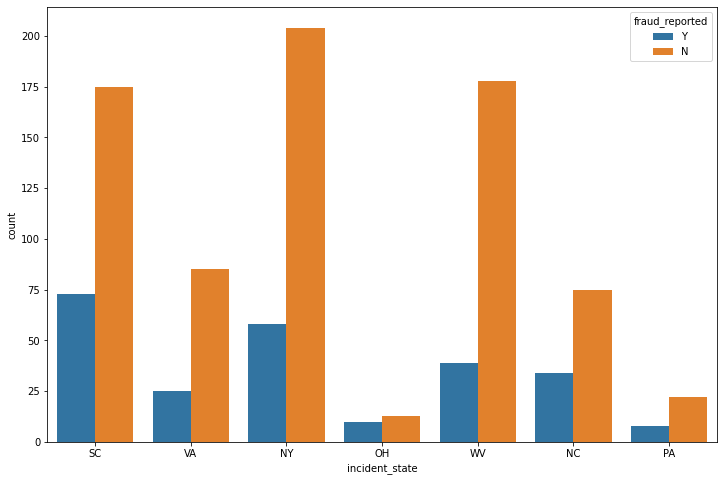

In [30]:
# Checking incident_state and fraud_reported
plt.figure(figsize=(12,8))
sns.countplot(x='incident_state',hue='fraud_reported',data=df)

Above we can see most of the fraud reported were in SC,VA,NY,OH,WV,NC,PA.

<AxesSubplot:xlabel='authorities_contacted', ylabel='count'>

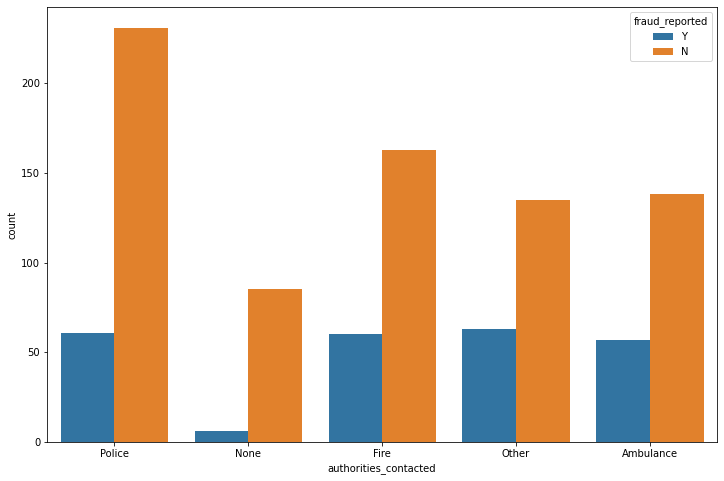

In [31]:
# Checking authorities_contacted and fraud_reported
plt.figure(figsize=(12,8))
sns.countplot(x='authorities_contacted',hue='fraud_reported',data=df)

Above we can see the fraud_reported is high.

<AxesSubplot:xlabel='incident_severity', ylabel='count'>

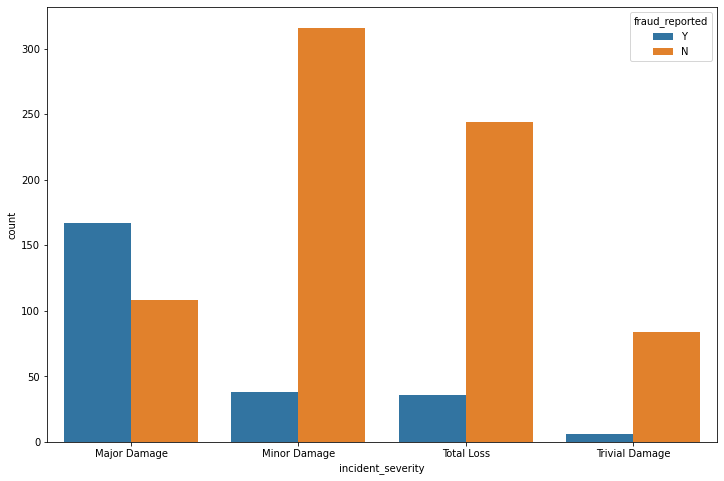

In [32]:
# Checking incident_severity and fraud_reported
plt.figure(figsize=(12,8))
sns.countplot(x='incident_severity',hue='fraud_reported',data=df)

There is a high in Minor Damage and Total loss and there are more in Trivial Damage.

<AxesSubplot:xlabel='collision_type', ylabel='count'>

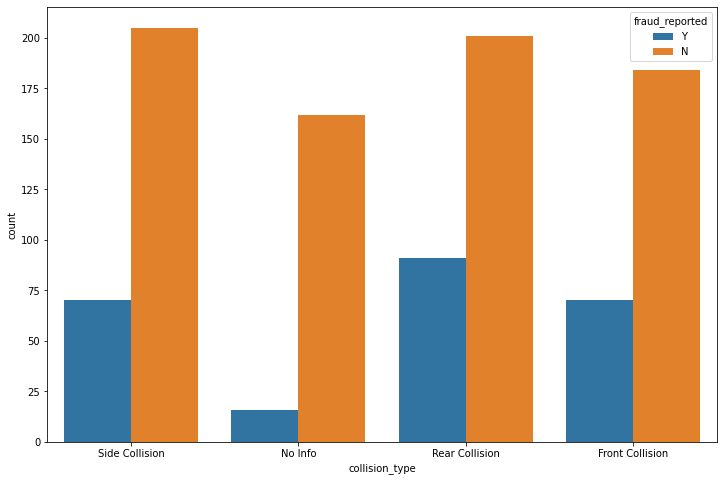

In [33]:
# checking collision_type and fraud_reported
plt.figure(figsize=(12,8))
sns.countplot(x='collision_type',hue='fraud_reported',data=df)

Above we can see the fraud reported from side collision,rear collision are more and we can see the no info some of reported claim and front collision. 

<AxesSubplot:xlabel='incident_type', ylabel='count'>

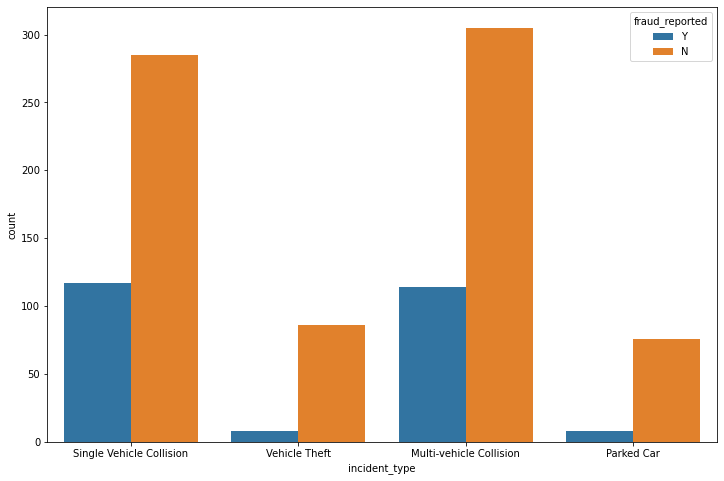

In [34]:
# Checking 'incident_type' and 'fraud_reported'
plt.figure(figsize=(12,8))
sns.countplot(x='incident_type',hue='fraud_reported',data=df)

Above we can see the most of the claim reported are from single vehicle collision and multi-vehicle collision. 
And we can see the vehicle Theft and parked Car are very less.

<AxesSubplot:xlabel='incident_Month', ylabel='count'>

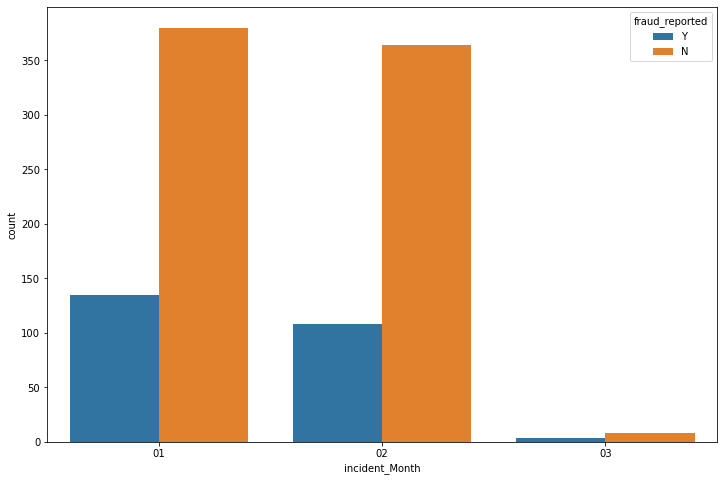

In [35]:
# Checking incident_Month and fraud_reported
plt.figure(figsize=(12,8))
sns.countplot(x='incident_Month',hue='fraud_reported',data=df)

Above we can see the most of the data are more in the month 1 and 2  and less in 3.

<AxesSubplot:xlabel='fraud_reported', ylabel='capital-loss'>

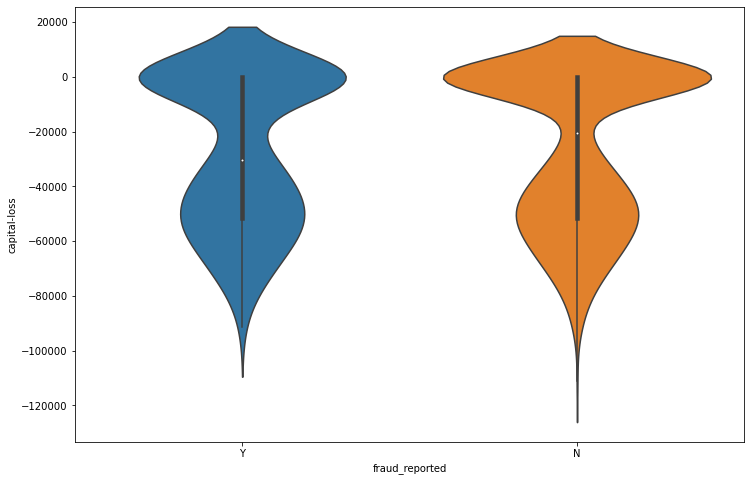

In [36]:
# Checking captial_loss and fraud_reported
plt.figure(figsize=(12,8))
sns.violinplot(y='capital-loss',x='fraud_reported',data=df)

Above we can see the most of fraud reported are in cx those captial loss are -40000 to-60000.

<AxesSubplot:xlabel='fraud_reported', ylabel='capital-gains'>

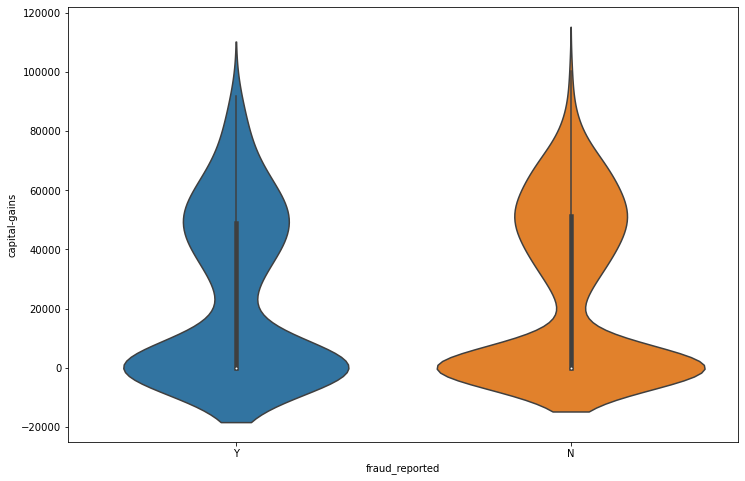

In [37]:
# Checking captial-gains and fraud_reported
plt.figure(figsize=(12,8))
sns.violinplot(y='capital-gains',x='fraud_reported',data=df)

Above we can see the fraud reported are in cx those captial gains are 0 and around 50000.

<AxesSubplot:xlabel='insured_relationship', ylabel='count'>

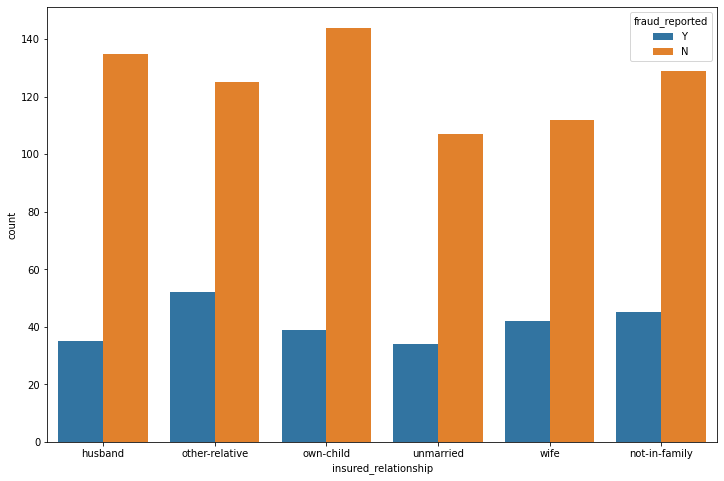

In [38]:
# Checking insured_relationship and fraud_reported
plt.figure(figsize=(12,8))
sns.countplot(x='insured_relationship',hue='fraud_reported',data=df)

Above we can see the data of insured_relationship with other relative and wife are most reported than others.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'sleeping'),
  Text(1, 0, 'reading'),
  Text(2, 0, 'board-games'),
  Text(3, 0, 'bungie-jumping'),
  Text(4, 0, 'base-jumping'),
  Text(5, 0, 'golf'),
  Text(6, 0, 'camping'),
  Text(7, 0, 'dancing'),
  Text(8, 0, 'skydiving'),
  Text(9, 0, 'movies'),
  Text(10, 0, 'hiking'),
  Text(11, 0, 'yachting'),
  Text(12, 0, 'paintball'),
  Text(13, 0, 'chess'),
  Text(14, 0, 'kayaking'),
  Text(15, 0, 'polo'),
  Text(16, 0, 'basketball'),
  Text(17, 0, 'video-games'),
  Text(18, 0, 'cross-fit'),
  Text(19, 0, 'exercise')])

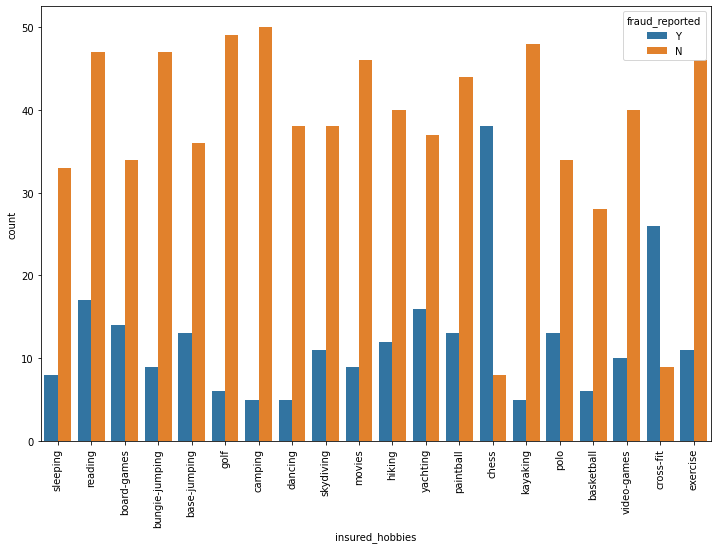

In [39]:
# checking insured_hobbies and fraud_reported
plt.figure(figsize=(12,8))
sns.countplot(x='insured_hobbies',hue='fraud_reported',data=df)
plt.xticks(rotation=90)

Since we can see the cx those hobbies are chess and cross-fit are more reported 

Above we can see the cx those are reading, board games, base-jumping, yacthting, painball, polo are more related than others.

<AxesSubplot:xlabel='fraud_reported', ylabel='vehicle_claim'>

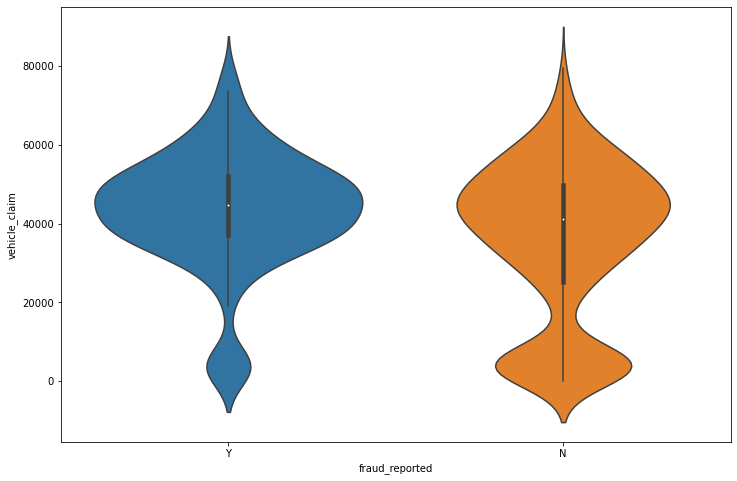

In [40]:
# Checking vechile_claim and fraud_reported
plt.figure(figsize=(12,8))
sns.violinplot(y='vehicle_claim',x='fraud_reported',data=df)

Above we can see fraud_reported are from 22000 to 50000 and vehicle_claim are from  30000 to 40000.

<AxesSubplot:xlabel='fraud_reported', ylabel='property_claim'>

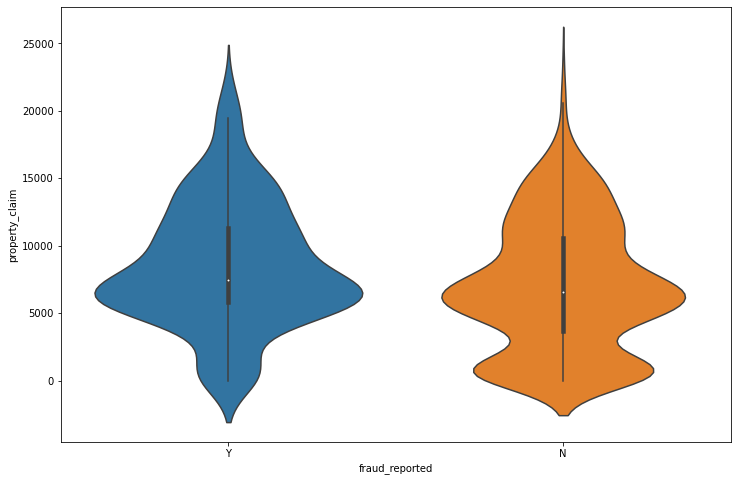

In [41]:
# Checking property_claim and fraud_reported
plt.figure(figsize=(12,8))
sns.violinplot(y='property_claim',x='fraud_reported',data=df)

Since Property claim is higher inn cx claimed of 5000 to 12000.

<AxesSubplot:xlabel='fraud_reported', ylabel='injury_claim'>

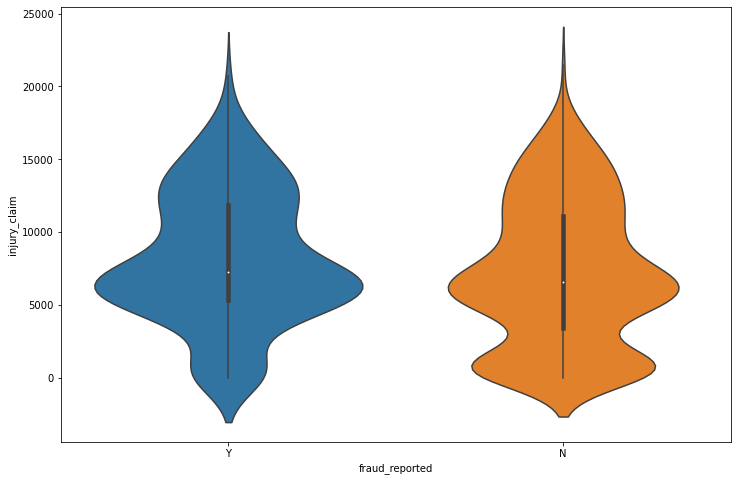

In [42]:
# Checking injury_claim and fraud_reported
plt.figure(figsize=(12,8))
sns.violinplot(y='injury_claim',x='fraud_reported',data=df)

Above we can see injury_claim are 5000 to 12000 and fraud_reported are 4000 to 10000.

<AxesSubplot:xlabel='insured_education_level', ylabel='count'>

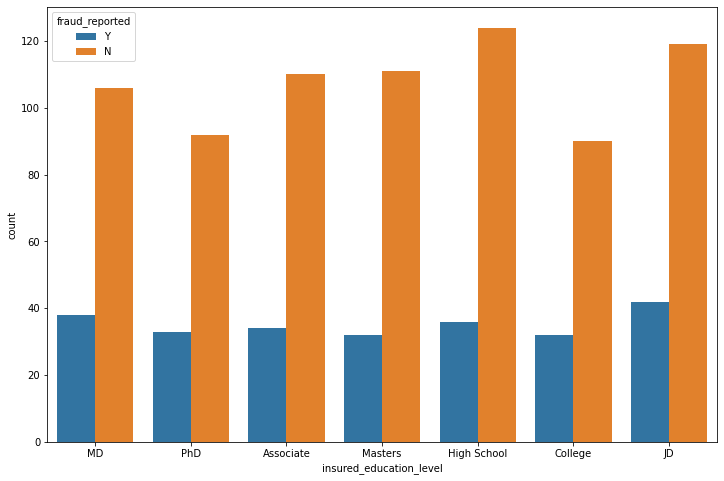

In [43]:
# Checking insured _education_level and fraud_reported
plt.figure(figsize=(12,8))
sns.countplot(x='insured_education_level',hue='fraud_reported',data=df)

Since we can see the more in the level is high school and little higher than the JD,MD,Phd.

<AxesSubplot:xlabel='insured_sex', ylabel='count'>

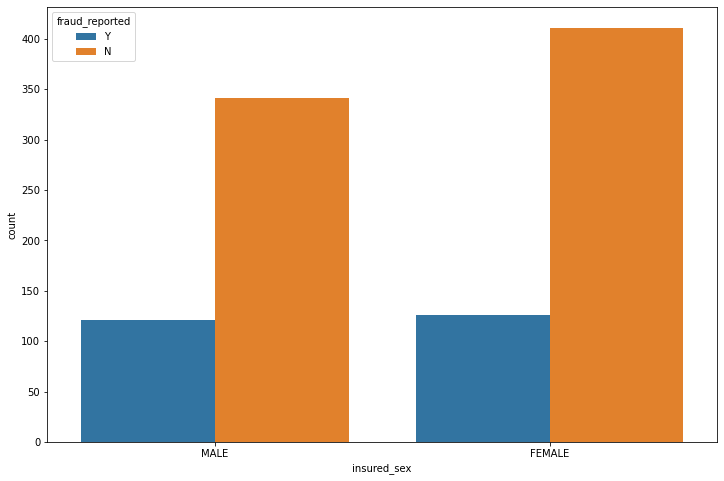

In [44]:
# Checking insured_sex and fraud_reported
plt.figure(figsize=(12,8))
sns.countplot(x='insured_sex',hue='fraud_reported',data=df)

Above we can see the female are more than the male and fraud reported also little high then male.

<AxesSubplot:xlabel='fraud_reported', ylabel='umbrella_limit'>

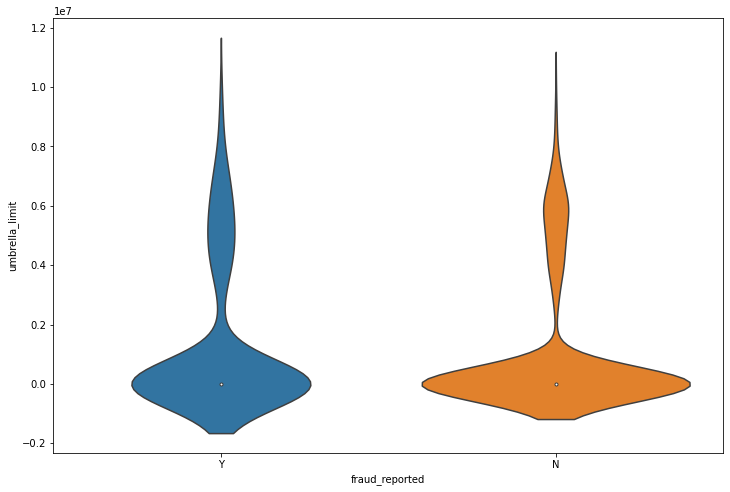

In [45]:
# Checking Fraud_reported and umbrella_limit
plt.figure(figsize=(12,8))
sns.violinplot(x='fraud_reported',y='umbrella_limit',data=df)

Above we can see umbrella_limit is 0.

<AxesSubplot:xlabel='fraud_reported', ylabel='policy_annual_premium'>

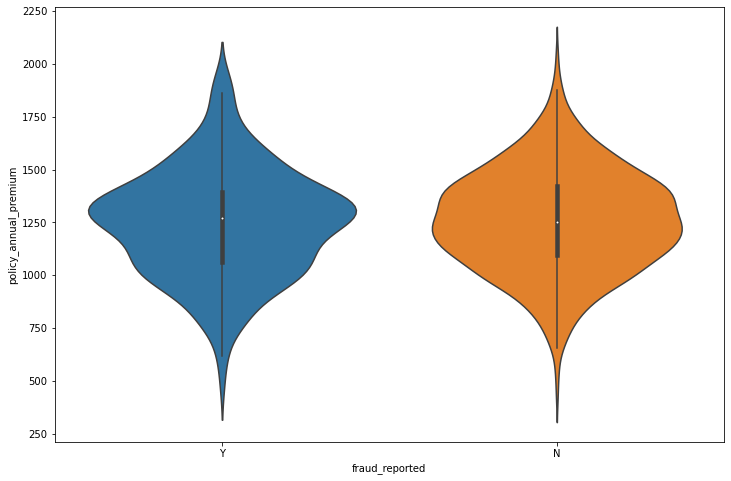

In [46]:
# Checking fraud_reported and policy_annual_premium
plt.figure(figsize=(12,8))
sns.violinplot(x='fraud_reported',y='policy_annual_premium',data=df)

Above we can see the 1000 to 1500 policy_annual_premium and 1250 to 1300 are for fraud_reported.

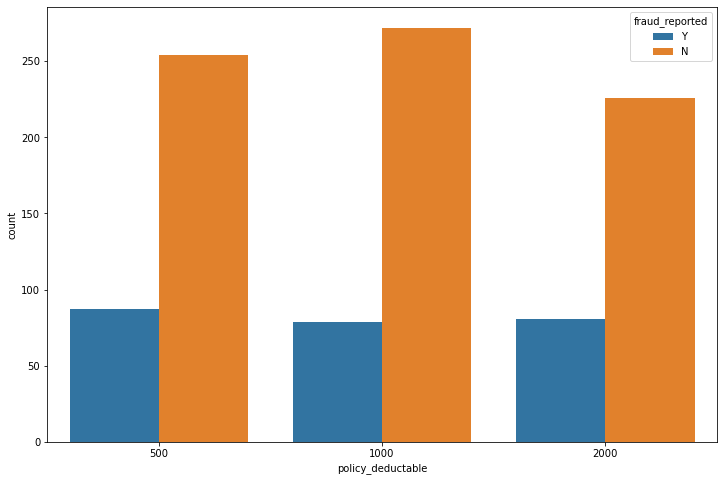

In [47]:
# Checking policy_deductable and fraud_reported
plt.figure(figsize=(12,8))
ax=sns.countplot(x='policy_deductable',hue='fraud_reported',data=df)

Above we can see fraud reported is high 2000 policy_deductable.

<AxesSubplot:xlabel='policy_csl', ylabel='count'>

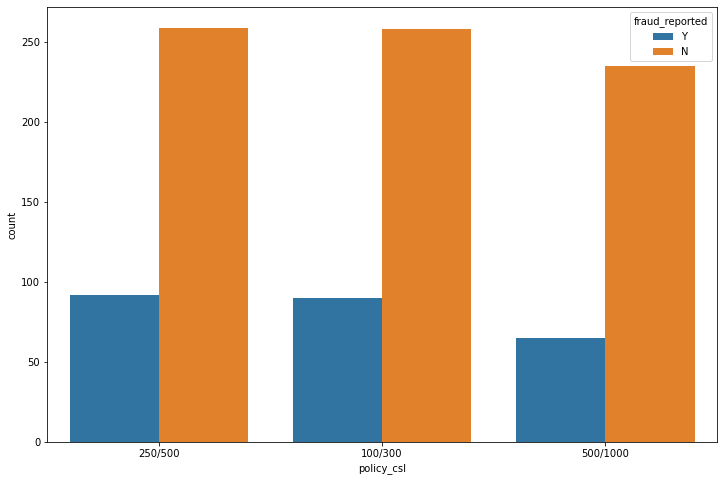

In [48]:
# Checking policy_csl and fraud_reported
plt.figure(figsize=(12,8))
sns.countplot(x='policy_csl',hue='fraud_reported',data=df)

Here we can see three are in similarity fraud report and also same in policy_csl

<AxesSubplot:xlabel='policy_state', ylabel='count'>

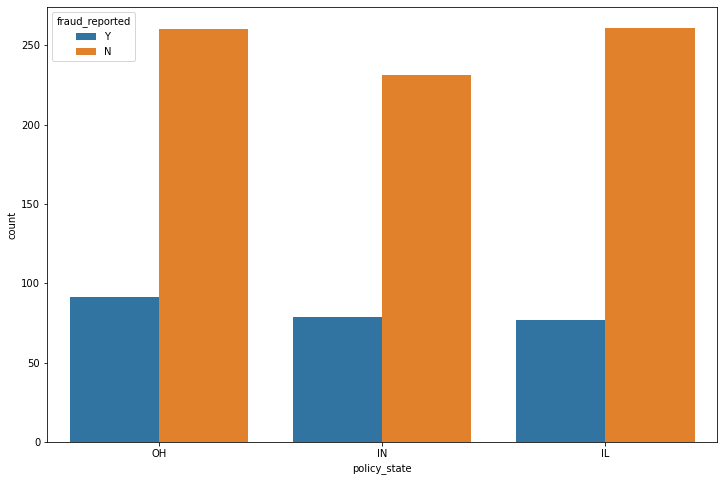

In [49]:
plt.figure(figsize=(12,8))
sns.countplot(x='policy_state',hue='fraud_reported',data=df)

Here we can see three policy_state and fraud_report almost common in all three states.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45]),
 [Text(0, 0, '19'),
  Text(1, 0, '20'),
  Text(2, 0, '21'),
  Text(3, 0, '22'),
  Text(4, 0, '23'),
  Text(5, 0, '24'),
  Text(6, 0, '25'),
  Text(7, 0, '26'),
  Text(8, 0, '27'),
  Text(9, 0, '28'),
  Text(10, 0, '29'),
  Text(11, 0, '30'),
  Text(12, 0, '31'),
  Text(13, 0, '32'),
  Text(14, 0, '33'),
  Text(15, 0, '34'),
  Text(16, 0, '35'),
  Text(17, 0, '36'),
  Text(18, 0, '37'),
  Text(19, 0, '38'),
  Text(20, 0, '39'),
  Text(21, 0, '40'),
  Text(22, 0, '41'),
  Text(23, 0, '42'),
  Text(24, 0, '43'),
  Text(25, 0, '44'),
  Text(26, 0, '45'),
  Text(27, 0, '46'),
  Text(28, 0, '47'),
  Text(29, 0, '48'),
  Text(30, 0, '49'),
  Text(31, 0, '50'),
  Text(32, 0, '51'),
  Text(33, 0, '52'),
  Text(34, 0, '53'),
  Text(35, 0, '54'),
  Text(36, 0, '55'),
  Text(37, 0, '56'),
  

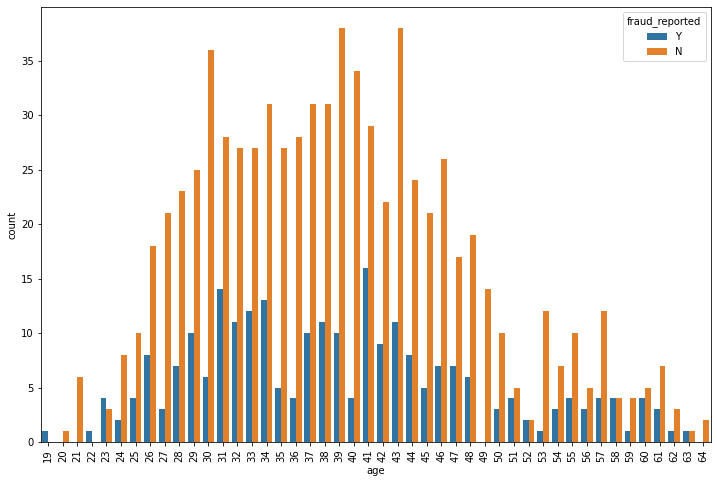

In [50]:
# Checking age and fraud_reported
plt.figure(figsize=(12,8))
sns.countplot(x='age',hue='fraud_reported',data=df)
plt.xticks(rotation = 90)

Here we can see the age from 23 to 61. Fraud report is from 21 to 61.

<AxesSubplot:xlabel='fraud_reported', ylabel='months_as_customer'>

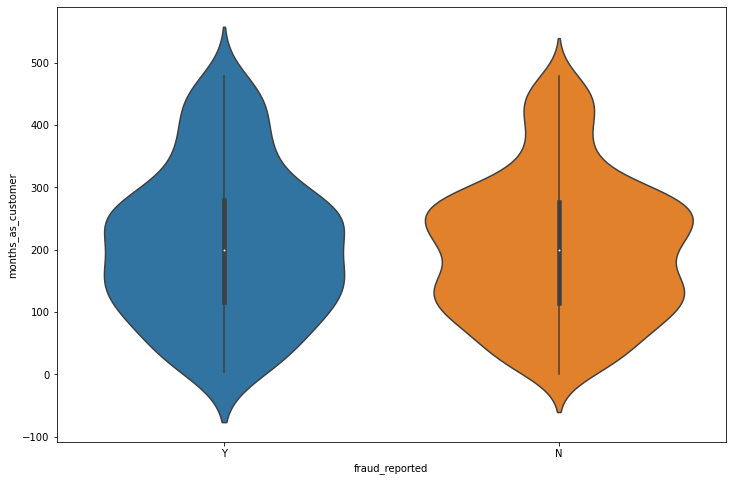

In [51]:
# Checking months_as_customer and fraud_reported
plt.figure(figsize=(12,8))
sns.violinplot(y='months_as_customer',x='fraud_reported',data=df)

Above we can see 100 to280 months_as_customer and fraud report is 100 to 250. 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 [Text(0, 0, '2014'),
  Text(1, 0, '2006'),
  Text(2, 0, '2000'),
  Text(3, 0, '1990'),
  Text(4, 0, '1997'),
  Text(5, 0, '2011'),
  Text(6, 0, '2002'),
  Text(7, 0, '1999'),
  Text(8, 0, '2012'),
  Text(9, 0, '1998'),
  Text(10, 0, '1992'),
  Text(11, 0, '2005'),
  Text(12, 0, '2004'),
  Text(13, 0, '1994'),
  Text(14, 0, '1991'),
  Text(15, 0, '1996'),
  Text(16, 0, '2013'),
  Text(17, 0, '2008'),
  Text(18, 0, '2003'),
  Text(19, 0, '2010'),
  Text(20, 0, '1993'),
  Text(21, 0, '1995'),
  Text(22, 0, '2007'),
  Text(23, 0, '2001'),
  Text(24, 0, '2009'),
  Text(25, 0, '2015')])

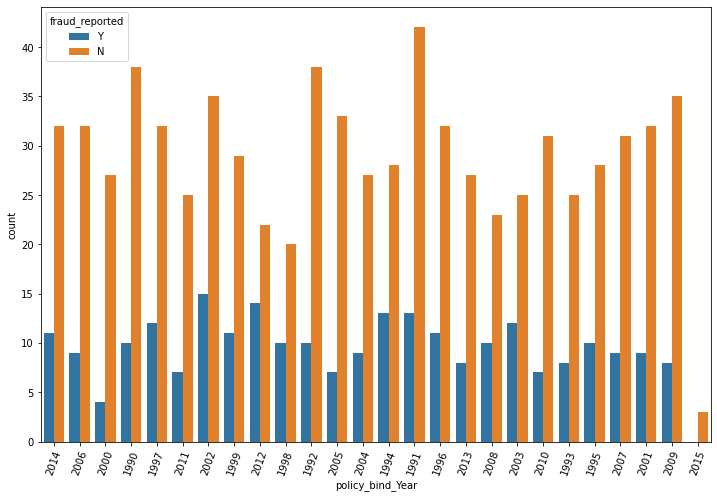

In [53]:
# Checking policy_bind_year and fraud_reported
plt.figure(figsize=(12,8))
sns.countplot(x='policy_bind_Year',hue='fraud_reported',data=df)
plt.xticks(rotation= 70,)

Above we can see fraud report is high in policy_bind_year are 2014,2006,1990,1997,2002,1992,2005,1991 etc.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 [Text(0, 0, '1995'),
  Text(1, 0, '1996'),
  Text(2, 0, '1997'),
  Text(3, 0, '1998'),
  Text(4, 0, '1999'),
  Text(5, 0, '2000'),
  Text(6, 0, '2001'),
  Text(7, 0, '2002'),
  Text(8, 0, '2003'),
  Text(9, 0, '2004'),
  Text(10, 0, '2005'),
  Text(11, 0, '2006'),
  Text(12, 0, '2007'),
  Text(13, 0, '2008'),
  Text(14, 0, '2009'),
  Text(15, 0, '2010'),
  Text(16, 0, '2011'),
  Text(17, 0, '2012'),
  Text(18, 0, '2013'),
  Text(19, 0, '2014'),
  Text(20, 0, '2015')])

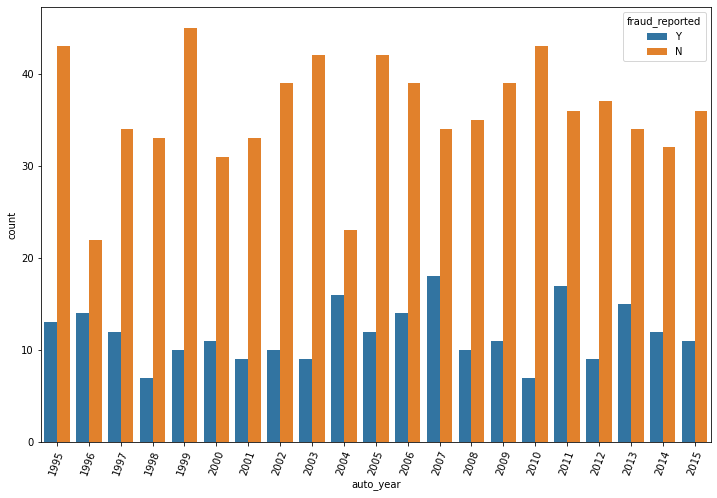

In [55]:
# checking the Auto_year and fraud_reported
plt.figure(figsize=(12,8))
sns.countplot(x='auto_year',hue='fraud_reported',data=df)
plt.xticks(rotation=70)


we can notice we have less vehicle from 1996 and 2004 auto year, according to vehice count fraud reported is higher in vehicle of 1996, 2004 , 2007, 2011, 2013, 2014 and etc auto year than others.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38]),
 [Text(0, 0, '92x'),
  Text(1, 0, 'E400'),
  Text(2, 0, 'RAM'),
  Text(3, 0, 'Tahoe'),
  Text(4, 0, 'RSX'),
  Text(5, 0, '95'),
  Text(6, 0, 'Pathfinder'),
  Text(7, 0, 'A5'),
  Text(8, 0, 'Camry'),
  Text(9, 0, 'F150'),
  Text(10, 0, 'A3'),
  Text(11, 0, 'Highlander'),
  Text(12, 0, 'Neon'),
  Text(13, 0, 'MDX'),
  Text(14, 0, 'Maxima'),
  Text(15, 0, 'Legacy'),
  Text(16, 0, 'TL'),
  Text(17, 0, 'Impreza'),
  Text(18, 0, 'Forrestor'),
  Text(19, 0, 'Escape'),
  Text(20, 0, 'Corolla'),
  Text(21, 0, '3 Series'),
  Text(22, 0, 'C300'),
  Text(23, 0, 'Wrangler'),
  Text(24, 0, 'M5'),
  Text(25, 0, 'X5'),
  Text(26, 0, 'Civic'),
  Text(27, 0, 'Passat'),
  Text(28, 0, 'Silverado'),
  Text(29, 0, 'CRV'),
  Text(30, 0, '93'),
  Text(31, 0, 'Accord'),
  Text(32, 0, 'X6'),
  Text(33, 0, 'Malibu'),
  Text(34, 0, 'F

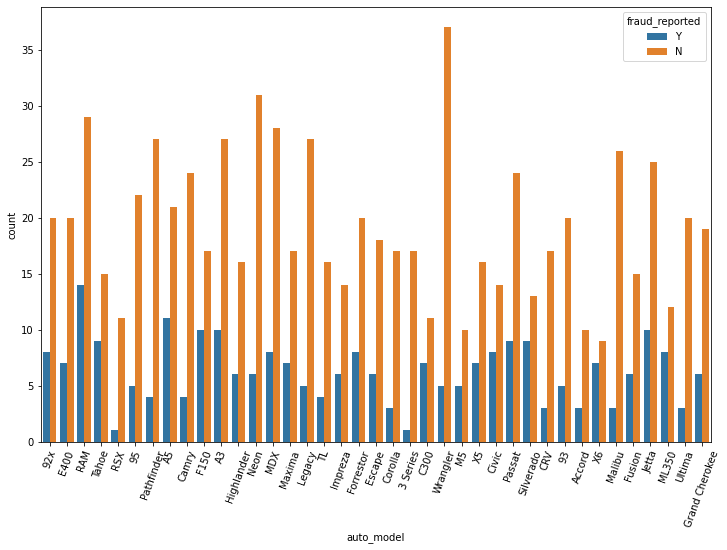

In [56]:
# checking the Auto_model and fraud reported
plt.figure(figsize=(12,8))
sns.countplot(x='auto_model',hue='fraud_reported',data=df)
plt.xticks(rotation=70,)

Most of auto_model we see inn wrangler,ram,pathfinder,neon and ,,,etc.
we can notice fraud reported is higher in 92x,ram,e400,tahore,,,,etc auto_models.

<AxesSubplot:xlabel='auto_make', ylabel='count'>

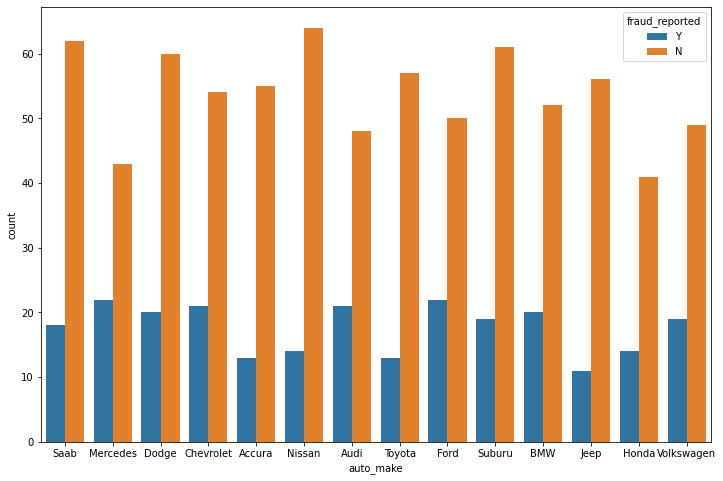

In [57]:
# checking Auto_make and fraud reported
plt.figure(figsize=(12,8))
sns.countplot(x='auto_make',hue='fraud_reported',data=df)

fraud reported claim is higher in Saab, Mercedes, Dodge, Chevrolet, Audi, Ford, Suburu, BMW and Volkswagen auto_make In Other Auto_make brand is less than others.

######  Have done the analysis of all important features,some of features don't have much information to define it.

### Skewness Handling:

#### skew and outliers will be handed in numerical columns only

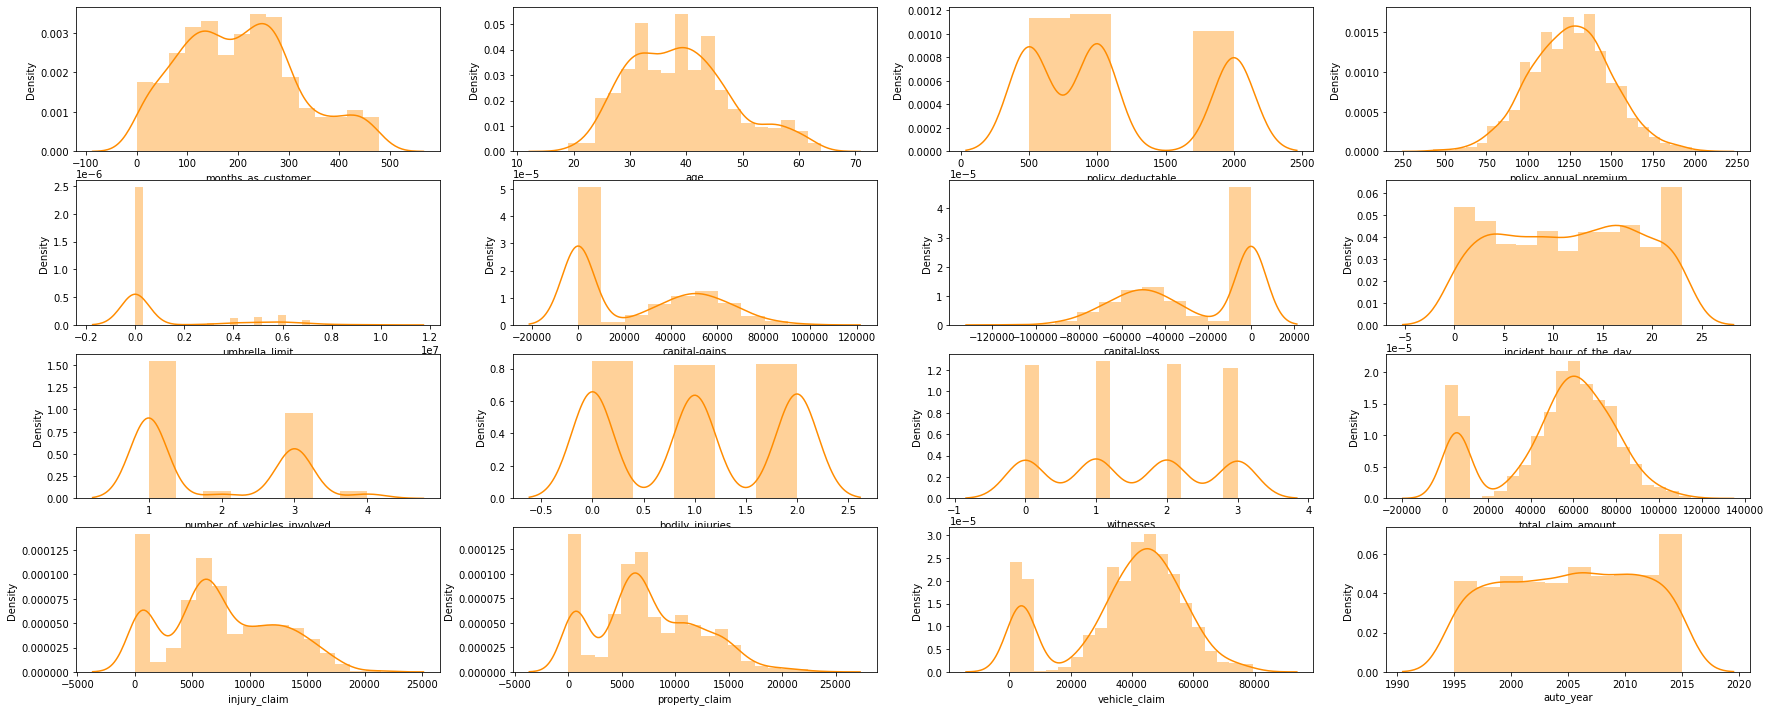

In [58]:
# plotting for numerical columns only
plt.figure(figsize=(30,25))
for i in enumerate(df.select_dtypes(include=['int64', 'float', 'int32'])):
    plt.subplot(8,4,i[0]+1)
    sns.distplot(df[i[1]],color='darkorange')

In [59]:
# selecting datatypes
df.select_dtypes(include=['int64', 'float','int32']).skew()

months_as_customer             0.364014
age                            0.479796
policy_deductable              0.476426
policy_annual_premium          0.005374
umbrella_limit                 1.806100
capital-gains                  0.477220
capital-loss                  -0.389813
incident_hour_of_the_day      -0.034990
number_of_vehicles_involved    0.501009
bodily_injuries                0.012940
witnesses                      0.018399
total_claim_amount            -0.595646
injury_claim                   0.265382
property_claim                 0.378121
vehicle_claim                 -0.622627
auto_year                     -0.049502
dtype: float64

* skewness more than+/- 0.5 will we treated

* object and target variable columns will not be treated

* we can see here most of the columns are skewed.

* It will only deal with numerical columns umbrella_limit, total_claim_amount, vehicle_claim.

In [60]:
from sklearn.preprocessing import power_transform

df[['umbrella_limit','total_claim_amount','vehicle_claim']]=power_transform(
    df[['umbrella_limit','total_claim_amount','vehicle_claim']],method='yeo-johnson')

### Outliers Handling:

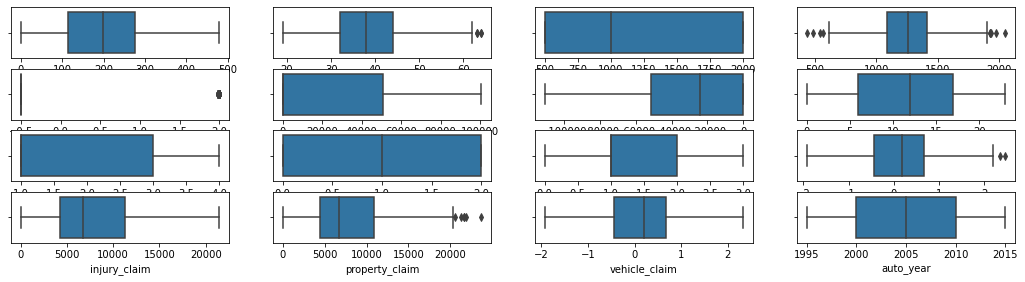

In [64]:
plt.figure(figsize=(18,10))
for o in enumerate(df.select_dtypes(include=['int64', 'float', 'int32'])):
     plt.subplot(9,4,o[0]+1)
     sns.boxplot(df[o[1]])

only some of columns seems having outliers after skewness removed.

### Outliers Removal:

#### zscore

In [65]:
from scipy.stats import zscore

z=np.abs(zscore(df.select_dtypes(include=['int64', 'float','int32'])))

print(np.where(z>3))

(array([229, 248, 499, 762, 806], dtype=int64), array([ 3,  3, 13,  3,  6], dtype=int64))


In [66]:
# getting outliers after removing outliers with new data frame for removing
df_1=df[(z<3).all(axis=1)]
print("with outliers::",df.shape)
print("After removing outliers::",df_1.shape)

with outliers:: (999, 41)
After removing outliers:: (994, 41)


ZScore removing all rows of data.

### IQR

In [67]:
# using IQR method

from scipy import stats
IQR = stats.iqr(df.select_dtypes(include=['int64', 'float','int32'])) 
IQR

1230.8691969059628

In [68]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
df_out = df.select_dtypes(include=['int64', 'float','int32'])[~((df.select_dtypes(include=['int64', 'float','int32']) < (Q1 - 1.5 * IQR)) |(df.select_dtypes(include=['int64', 'float','int32']) > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df_out.shape)

(313, 16)


Choosing ZScore because there is huge data loss in IQR.

In [69]:
df=df_1

#### Using LabelEncoder for convering categorical to numerical`

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 994 entries, 0 to 999
Data columns (total 41 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           994 non-null    int64  
 1   age                          994 non-null    int64  
 2   policy_state                 994 non-null    object 
 3   policy_csl                   994 non-null    object 
 4   policy_deductable            994 non-null    int64  
 5   policy_annual_premium        994 non-null    float64
 6   umbrella_limit               994 non-null    float64
 7   insured_sex                  994 non-null    object 
 8   insured_education_level      994 non-null    object 
 9   insured_occupation           994 non-null    object 
 10  insured_hobbies              994 non-null    object 
 11  insured_relationship         994 non-null    object 
 12  capital-gains                994 non-null    int64  
 13  capital-loss        

In [71]:
from sklearn.preprocessing import LabelEncoder

In [72]:
#Encoding object columns into Numeric Values in df
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
categ_data = df.select_dtypes(exclude=['int64', 'float','int32'])
for val in categ_data:
    df[val]=le.fit_transform(df[val].astype(str))

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 994 entries, 0 to 999
Data columns (total 41 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           994 non-null    int64  
 1   age                          994 non-null    int64  
 2   policy_state                 994 non-null    int32  
 3   policy_csl                   994 non-null    int32  
 4   policy_deductable            994 non-null    int64  
 5   policy_annual_premium        994 non-null    float64
 6   umbrella_limit               994 non-null    float64
 7   insured_sex                  994 non-null    int32  
 8   insured_education_level      994 non-null    int32  
 9   insured_occupation           994 non-null    int32  
 10  insured_hobbies              994 non-null    int32  
 11  insured_relationship         994 non-null    int32  
 12  capital-gains                994 non-null    int64  
 13  capital-loss        

All columns are converted into numerical now.

#### Dividing data into X and Y

In [74]:
x=df.drop(['fraud_reported'],axis=1)
y=df['fraud_reported']

In [75]:
x.shape

(994, 40)

In [76]:
y.shape

(994,)

#### Scaling X values:

In [77]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
x=sc.fit_transform(x)

In [78]:
pd.DataFrame(x).isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    0
dtype: int64

In [79]:
pd.DataFrame(x).describe()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
count,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,...,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.0,994.000000,994.000000,994.000000
mean,0.426698,0.443975,0.507042,0.474849,0.424883,0.502476,0.201896,0.463783,0.494634,0.512692,...,0.452576,0.504179,0.508790,0.505785,0.467270,0.248994,0.0,0.480751,0.506585,0.463380
std,0.240313,0.203319,0.415523,0.402499,0.408046,0.168078,0.401223,0.498938,0.324961,0.309271,...,0.235036,0.310061,0.293301,0.300326,0.288265,0.261924,0.0,0.293300,0.318378,0.294742
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,0.242171,0.288889,0.000000,0.000000,0.000000,0.385783,0.000000,0.000000,0.166667,0.230769,...,0.349015,0.230769,0.263158,0.250000,0.233333,0.000000,0.0,0.233333,0.181818,0.200000
50%,0.417537,0.422222,0.500000,0.500000,0.333333,0.502305,0.000000,0.000000,0.500000,0.538462,...,0.499869,0.538462,0.526316,0.500000,0.466667,0.000000,0.0,0.483333,0.545455,0.480000
75%,0.577766,0.572222,1.000000,1.000000,1.000000,0.613049,0.000000,1.000000,0.833333,0.769231,...,0.612979,0.769231,0.763158,0.750000,0.700000,0.500000,0.0,0.733333,0.818182,0.720000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000


Total data have been scalled

#### Imbalanced learn

###### Using OverSampling_BorderlineSMOTE

<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

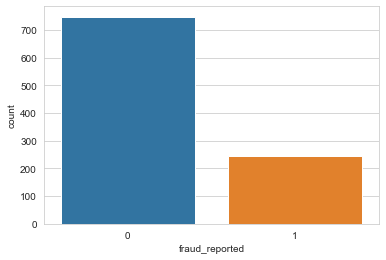

In [80]:
sns.set_style("whitegrid")
sns.countplot(x="fraud_reported", data=df)

In [81]:
from imblearn.over_sampling import BorderlineSMOTE
x_rus, y_rus =BorderlineSMOTE().fit_resample(x, y)
print('original  Target dataset shape:',y.shape)
print('Resample Target dataset shape',y_rus.shape)

original  Target dataset shape: (994,)
Resample Target dataset shape (1496,)


<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

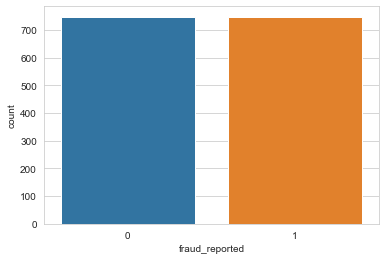

In [82]:
sns.set_style("whitegrid")
sns.countplot(y_rus)

Now we have balanced data for model training

#### Spliting Train and Test data

In [83]:
from sklearn.model_selection import train_test_split

In [85]:
x_train,x_test,y_train,y_test=train_test_split(x_rus,y_rus,test_size=.27,random_state=42)

In [87]:
x_train.shape

(1092, 40)

In [88]:
y_train.shape

(1092,)

In [89]:
x_test.shape

(404, 40)

In [90]:
y_test.shape

(404,)

#### MODEL BUILDING:

In [91]:
 # importing necessary libraries
    
from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

import warnings
from sklearn.model_selection import cross_val_score
warnings.filterwarnings('ignore')

### LogisticRegression

In [92]:
logreg=LogisticRegression()
logreg_score=cross_val_score(logreg,x_rus,y_rus,cv=5,scoring='accuracy')
print("cross validation score:",np.mean(logreg_score))

cross validation score: 0.7647224080267557


In [93]:
logreg.fit(x_train,y_train)
LR_predicted=logreg.predict(x_test)

print(accuracy_score(y_test,LR_predicted))
print(confusion_matrix(y_test,LR_predicted))
print(classification_report(y_test,LR_predicted))
print("Training accuracy::",logreg.score(x_train,y_train))
print("Test accuracy::",logreg.score(x_test,y_test))

0.7475247524752475
[[131  55]
 [ 47 171]]
              precision    recall  f1-score   support

           0       0.74      0.70      0.72       186
           1       0.76      0.78      0.77       218

    accuracy                           0.75       404
   macro avg       0.75      0.74      0.75       404
weighted avg       0.75      0.75      0.75       404

Training accuracy:: 0.7783882783882784
Test accuracy:: 0.7475247524752475


### KNeighborsClassifier

In [95]:
# getting to know the validation score
knn=KNeighborsClassifier()
knn_score=cross_val_score(knn,x_rus,y_rus,cv=5,scoring='accuracy')
print("cross validation score for knn:",np.mean(knn_score))

cross validation score for knn: 0.6751527313266443


In [96]:
knn.fit(x_train,y_train)
predicted_knn=knn.predict(x_test)
print(accuracy_score(y_test,predicted_knn))
print(confusion_matrix(y_test,predicted_knn))
print(classification_report(y_test,predicted_knn))
print("Training accuracy::",knn.score(x_train,y_train))
print("Test accuracy::",knn.score(x_test,y_test))

0.655940594059406
[[ 62 124]
 [ 15 203]]
              precision    recall  f1-score   support

           0       0.81      0.33      0.47       186
           1       0.62      0.93      0.74       218

    accuracy                           0.66       404
   macro avg       0.71      0.63      0.61       404
weighted avg       0.71      0.66      0.62       404

Training accuracy:: 0.7490842490842491
Test accuracy:: 0.655940594059406


### RandomForestClassifier

In [97]:
# getting to know the score of RFC cross validation score
rfc=RandomForestClassifier()
rfc_score=cross_val_score(rfc,x_rus,y_rus,cv=5,scoring='accuracy')
print("cross validation score for rfc:",np.mean(rfc_score))

cross validation score for rfc: 0.8717502787068006


In [98]:
rfc.fit(x_train,y_train)
predicted_rfc=rfc.predict(x_test)
print(accuracy_score(y_test,predicted_rfc))
print(confusion_matrix(y_test,predicted_rfc))
print(classification_report(y_test,predicted_rfc))
print("Training accuracy::",rfc.score(x_train,y_train))
print("Test accuracy::",rfc.score(x_test,y_test))

0.8539603960396039
[[159  27]
 [ 32 186]]
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       186
           1       0.87      0.85      0.86       218

    accuracy                           0.85       404
   macro avg       0.85      0.85      0.85       404
weighted avg       0.85      0.85      0.85       404

Training accuracy:: 1.0
Test accuracy:: 0.8539603960396039


### ENSEMBLE TECHNIQUES:

#### 1.ADA BOOST CLASSIFIER

In [99]:
# using ADA boost classifier
adb=AdaBoostClassifier()
adb_score=cross_val_score(adb,x_rus,y_rus,cv=10,scoring='accuracy')
print("cross validation score for Ada boost:",np.mean(adb_score))

cross validation score for Ada boost: 0.854496644295302


In [100]:
adb.fit(x_train,y_train)
predicted_adb=adb.predict(x_test)
print(accuracy_score(y_test,predicted_adb))
print(confusion_matrix(y_test,predicted_adb))
print(classification_report(y_test,predicted_adb))
print("Training accuracy::",adb.score(x_train,y_train))
print("Test accuracy::",adb.score(x_test,y_test))

0.8465346534653465
[[159  27]
 [ 35 183]]
              precision    recall  f1-score   support

           0       0.82      0.85      0.84       186
           1       0.87      0.84      0.86       218

    accuracy                           0.85       404
   macro avg       0.85      0.85      0.85       404
weighted avg       0.85      0.85      0.85       404

Training accuracy:: 0.9010989010989011
Test accuracy:: 0.8465346534653465


#### 2.Bagging Classifier:

In [101]:
# using Bagging classifier
bgc=BaggingClassifier()
bgc_score=cross_val_score(bgc,x_rus,y_rus,cv=10,scoring='accuracy')
print("cross validation score for BAGGING Classifier:",np.mean(bgc_score))

cross validation score for BAGGING Classifier: 0.8684697986577181


In [102]:
bgc.fit(x_train,y_train)
predicted_bgc=bgc.predict(x_test)
print(accuracy_score(y_test,predicted_bgc))
print(confusion_matrix(y_test,predicted_bgc))
print(classification_report(y_test,predicted_bgc))
print("Training accuracy::",bgc.score(x_train,y_train))
print("Test accuracy::",bgc.score(x_test,y_test))

0.8762376237623762
[[157  29]
 [ 21 197]]
              precision    recall  f1-score   support

           0       0.88      0.84      0.86       186
           1       0.87      0.90      0.89       218

    accuracy                           0.88       404
   macro avg       0.88      0.87      0.88       404
weighted avg       0.88      0.88      0.88       404

Training accuracy:: 0.9880952380952381
Test accuracy:: 0.8762376237623762


#### 3.Gradient Boosting classifier:

In [103]:
# using Gradient Boosting Classifier
grbc=GradientBoostingClassifier()
grbc_score=cross_val_score(grbc,x_rus,y_rus,cv=10,scoring='accuracy')
print("cross validation score for Gradient Boosting Classifier:",np.mean(grbc_score))

cross validation score for Gradient Boosting Classifier: 0.8804921700223713


In [104]:
grbc.fit(x_train,y_train)
predicted_grbc=grbc.predict(x_test)
print(accuracy_score(y_test,predicted_grbc))
print(confusion_matrix(y_test,predicted_grbc))
print(classification_report(y_test,predicted_grbc))
print("Training accuracy::",grbc.score(x_train,y_train))
print("Test accuracy::",grbc.score(x_test,y_test))

0.8836633663366337
[[155  31]
 [ 16 202]]
              precision    recall  f1-score   support

           0       0.91      0.83      0.87       186
           1       0.87      0.93      0.90       218

    accuracy                           0.88       404
   macro avg       0.89      0.88      0.88       404
weighted avg       0.89      0.88      0.88       404

Training accuracy:: 0.9734432234432234
Test accuracy:: 0.8836633663366337


GradientBoostingClassifier as final model

for HYPER PARAMETER TUNING because both train and test accuracies are pretty close and highest as well.

### HYPER PARAMETER TUNING:

#### GradientBoostingClassifier

In [105]:
adb=GradientBoostingClassifier()
param_grid={
    'criterion' : ['mse', 'mae'],
    'n_estimators':[100,200],
    'learning_rate':[0.1,0.5,1.0],
     'random_state':[5]              
}

In [107]:
adb_grid=GridSearchCV(GradientBoostingClassifier(),param_grid,cv=4,scoring='accuracy',n_jobs=-1,verbose=1)
                

In [108]:
# Accuracy after parameter tuning
adb_grid.fit(x_train,y_train)
adb_pred=adb_grid.best_estimator_.predict(x_test)
print("Accuracy after parameter tuning::",accuracy_score(y_test,adb_pred))

Fitting 4 folds for each of 12 candidates, totalling 48 fits
Accuracy after parameter tuning:: 0.8886138613861386


In [112]:
adb_grid.best_params_

{'criterion': 'mse',
 'learning_rate': 0.1,
 'n_estimators': 200,
 'random_state': 5}

### model training with best parameters

In [113]:
best_param={
    'criterion' : ['mse'],
    'n_estimators':[100],
    'learning_rate':[0.5],
     'random_state':[5]   
}

In [117]:
best_adb_grid=GridSearchCV(GradientBoostingClassifier(),best_param,cv=4,scoring='accuracy',n_jobs=-1,verbose=2)

In [118]:
best_adb_grid.fit(x_train,y_train)
best_adb_pred=best_adb_grid.best_estimator_.predict(x_test)
print("Accuracy after parameter tuning::",accuracy_score(y_test,best_adb_pred))

Fitting 4 folds for each of 1 candidates, totalling 4 fits
Accuracy after parameter tuning:: 0.8762376237623762


As we notice after HYPER PARAMETER TUNING models accuracy score got increased.

#### Report of GradientBoostingClassifier:

In [119]:
print("CLASSIFICATION REPORT::\n",classification_report(y_test,best_adb_pred))

CLASSIFICATION REPORT::
               precision    recall  f1-score   support

           0       0.88      0.85      0.86       186
           1       0.88      0.90      0.89       218

    accuracy                           0.88       404
   macro avg       0.88      0.87      0.88       404
weighted avg       0.88      0.88      0.88       404



<AxesSubplot:>

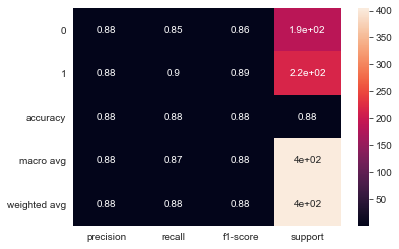

In [123]:
clsf_repo = classification_report(y_test,best_adb_pred,output_dict=True)
sns.heatmap(pd.DataFrame(clsf_repo).T, annot=True)

In [124]:
from sklearn.metrics import roc_auc_score

In [125]:
print("roc auc score::",roc_auc_score(y_test, best_adb_pred))

roc auc score:: 0.8742724671993687


In [126]:
from sklearn.metrics import roc_curve

In [129]:
fpr1, tpr1, thresh1 = roc_curve(y_test, best_adb_pred, pos_label=1)

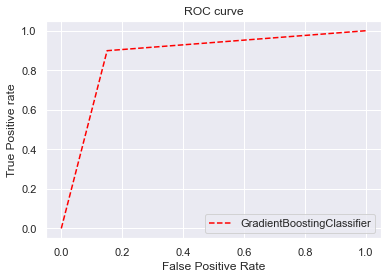

In [130]:
#plotting ROC CURVE
sns.set_theme(style="darkgrid")
plt.plot(fpr1, tpr1, linestyle='--',color='red', label='GradientBoostingClassifier')

plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

# Saving Model:

In [131]:
import joblib

In [133]:
joblib.dump(best_adb_grid.best_estimator_,'Insurance Claims- Fraud Detection.pkl')

['Insurance Claims- Fraud Detection.pkl']

# Done

# !!!Thank You!!!